___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# SEGUNDO EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Alfonso Aguilar Aguirre

## Fecha: 19 de Octubre del 2018

## Por: Oscar David Jaramillo Z.

In [44]:
import numpy as np
from scipy import integrate
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy import optimize


# 1.
La financiera ”El cerdito feliz” atiende la apertura de cuentas de ahorro en su sucursal matriz, en esta sucursal se tienen 4 ejecutivos para atención al inversionista, teniendo una media de tiempo para la atención de un cliente de 30 minutos, aunque con frecuencia se requiere que uno de los ejecutivos participe en juntas de evaluación de crédito, lo que provoca que el equipo de atención disminuya a 3 ejecutivos y en estas circunstancias el promedio de atención por cliente aumenta a 45 minutos. El tiempo entre la llegada de cada cliente en promedio es de 25 minutos, si la apertura de la sucursal es a las 9:00 a.m. y cierra su atención al público a las 14:00 horas, realiza una simulación de mímino 1000 escenarios y responda

   a).Justifique que tipo de distribuciones de probabilidad va a utilizar para realizar montecarlo.
   
   b). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 3 ejecutivos?, ¿cuántos quedarán en cola?
   
   c). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 4 ejecutivos?, ¿Cuántos quedarán en cola?


In [131]:
def tllegada(t):
    N=1000
    tll=np.random.poisson(t,N)
    return np.count_nonzero(np.cumsum(tll)<300)
def tatencion(t):
    N=1000
    ta=np.random.poisson(t,N)
    return np.count_nonzero(np.cumsum(ta)<300)
    

In [133]:
print('La distribucion a utilizar sera la de poisson porque expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. ')
np.mean(list(map(lambda n :tllegada(25),range(1000))))
print('Con un equipo de 3 ejecutivos se atenderan: ',np.mean(list(map(lambda n :tatencion(45),range(1000)))))
print('Con un equipo de 3 ejecutivos quedaran en la cola: ',np.mean(list(map(lambda n :tllegada(25),range(1000))))-np.mean(list(map(lambda n :tatencion(45),range(1000)))))



print('Con un equipo de 3 ejecutivos se atenderan: ',np.mean(list(map(lambda n :tatencion(30),range(1000)))))
print('Con un equipo de 3 ejecutivos quedaran en la cola: ',np.mean(list(map(lambda n :tllegada(25),range(1000))))-np.mean(list(map(lambda n :tatencion(30),range(1000)))))


9.481

# 2 
a). Demuestre que la distribución de poisson satisface la siguiente forma recursiva de su probabilidad
$$ p(k+1)={\lambda \over k+1}p(k)$$

Realizar todo el desarrollo matemático en mardown usando ecuaciones latex.

b). De el resultado demostrado en el inciso a) (usando la ecuación recursiva), gráfique la función de distribución de probabilidad y su función acumulada, para $\lambda = [4,10,30]$, valide sus resultados comparando con el paquete estadístico `scipy.stats`. Posteriormente, genere muestras aletorias que distribuyan poisson con el conjunto de parámetros lambda dados y realice el histograma correspondiente (en gráficas distintas para cada lambda), validando lo obtenido al graficar la función de densidad de probabilidad. **Nota**: Recuerde que la distribución de poisson es una distribución de probabilidad discreta así que el histograma debe ser discreto y no continuo.

$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
$$p_k=\frac{e^{-\lambda}(\lambda)^k}{k!}\hspace{1cm} (1)$$
$$p_{k+1}=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!} \hspace{1cm} (2)$$
$$p_{k+1} = \frac{e^{-\lambda}(\lambda)^{k}}{k!} \frac{\lambda}{k+1} $$
$$ p_{k+1} = \frac{\lambda}{k+1} p_{k} $$

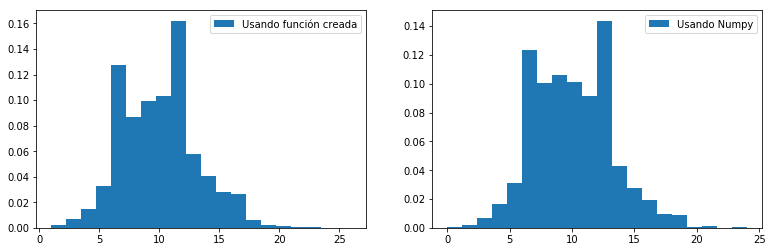

In [59]:
def P_acum_Poisson(p,N):
    n = N
    pr = [np.exp(-p)]
    add = pr.append
    for i in range(n+1):
        add(((p)/(i+1))*pr[-1])
    return np.cumsum(pr)
p = 10
N = 10**4
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,20,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_poi_numpy = np.random.poisson(p,N)
plt.hist(d_poi_numpy,20,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()

# 3
Demostrar **Teoricamente** usando el método de máxima verosimilitud, que los estimadores para los parámetros $\mu$ y $\sigma$ de una distribución normal, estan dados por:

$$\hat \mu = {1\over n}\sum_{i=1}^n x_i,\quad \hat  \sigma^2={1\over n}\sum_{i=1}^n (x_i-\hat \mu)^2$$

**Recuerde que:** La distribución normal es
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$
$$f(\mu,\sigma)=f_x(x_1|\mu,\sigma)*f_x(x_2|\mu,\sigma)*.......f_x(x_n|\mu,\sigma)$$

Resolvemos la multiplicatoria
>>$$f_x(\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}^{n}e^{\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^{2}}$$
>>$$\ln{L(\mu,\sigma)}=n\ln{\frac{1}{\sqrt{2\pi\sigma^2}}}-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$$
>>$$\ln{L(\mu,\sigma)}=n\ln{1}-\frac{n}{2}\ln{2\pi\sigma^2}-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$$
>>$$\ln{L(\mu,\sigma)}=n\ln{1}-\frac{n}{2}\ln{2\pi}-\frac{n}{2}\ln{\sigma^2}-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$$
>>$$\ln{L(\mu,\sigma)}=n\ln{1}-\frac{n}{2}\ln{2\pi}-n\ln{\sigma}-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$$

Derivamos respecto a mu
>>$$\frac{\partial \ln{L}}{\partial \mu}=-\frac{2}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)(-1)$$
>>$$\frac{\partial \ln{L}}{\partial \mu}=\frac{1}{\sigma^2}\sum_{i=1}^n(x_i-\mu)$$
>>$$0=\frac{1}{\sigma^2}[\sum_{i=1}^n(x_i)-\sum_{i=1}^n(\mu)]$$
>>$$0=\sum_{i=1}^n(x_i)-n(\mu)$$
>>$$n(\mu)=\sum_{i=1}^n(x_i)$$
Obtenemos:
>>$$\mu=\frac{1}{n}\sum_{i=1}^n(x_i)$$

Derivamos respecto a sigma
>>$$\frac{\partial \ln{L}}{\partial \sigma}=-\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2$$
>>$$0=-\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2$$
>>$$\frac{n}{\sigma}=\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2$$
>>$$\frac{n\sigma^3}{\sigma}=\sum_{i=1}^n(x_i-\mu)^2$$
>>$$n\sigma^2=\sum_{i=1}^n(x_i-\mu)^2$$
Obtenemos:
>>$$\sigma^2=\frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2$$


Lo cual quieda demostrado



# <font color = red> Nota: </font>

Recuerde que maximizar la función de máxima verosimilitud $L(\theta)$ es equivalente a maximizar su logaritmo $l(\theta)= ln(L(\theta))$

> Referencia: Resultados obtenidos del libro:  Paolo Brandimarte -Handbook in Monte Carlo Simulation

# 4
Un banco, de acuerdo a la ley, tienen la posibilidad de poder invertir las utilidades logradas por créditos de trabajo quirografarios en dos diferentes instrumentos de inversión: El primero es inversión en deuda que presenta una utilidad promedio del 23.5% con una desviación estándar de 1.1%. El segundo es inversión a plazo donde la rentabilidad esperada se comporta como una distribución uniforme y está entre el -2% y el 9%, pero nunca entre -0.5% y 0.5%. Calcular cuál es la mejor combinación posible, si la inversión será en múltiplos de 25%, es decir (inv1 25%, Inv2 75%)-(Inv1 50%,Inv2 50%)-(Inv1 75%, Inv2 25%), simular 1000 veces (escenarios) e indicar rendimientos promedio por combinación.

In [113]:
pond=[.25,.5,.75]
N=1000
r1=np.random.normal(23.5,1.1,N)/100
r2=np.concatenate((np.random.uniform(-2,-.51,int(N/2)),np.random.uniform(.51,9,int(N/2))), axis=None)/100
z=list(map(lambda x,y: np.mean(100*x*r1+100*y*r2),pond,pond[::-1]))
print('Rendimiento promedio para la combinacion: 25% inv1 y 75% inv2',z[0])
print('Rendimiento promedio para la combinacion: 50% inv1 y 50% inv2',z[1])
print('Rendimiento promedio para la combinacion: 75% inv1 y 25% inv2',z[2])
print('La mejor combinacion posible seria la de 75% inv1 y 25% inv2')


[7.172355375454407, 12.611949086195342, 18.051542796936275]

# 5
Considere la siguiente función de distribución de probabilidad
$$ f(x)=\begin{cases}400e^{-400(x-1)},& \text{para }x\geq 1\\0,& \text{otro caso}\end{cases}$$

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.

b). Realice el desarrollo teórico para obtener muestras aletorias de esta dstribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos.

c). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias.

**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

d). Use el método de montecarlo crudo para estimar la media.

e). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

f). Use el método de los números complementarios.

g). Finalmente use el método de estratificación en el cúal se divide en N estratos.

h). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a).

In [39]:
def fun(x):
    if x>=1:
        return (400*np.exp(-400*(x-1)))
    else:
        return 0
    
def fun_estratificado(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return np.mean(list(map(lambda x:f_inv(x),v)))
def pesos(data,N,rang):
    return len(data)/N/rang


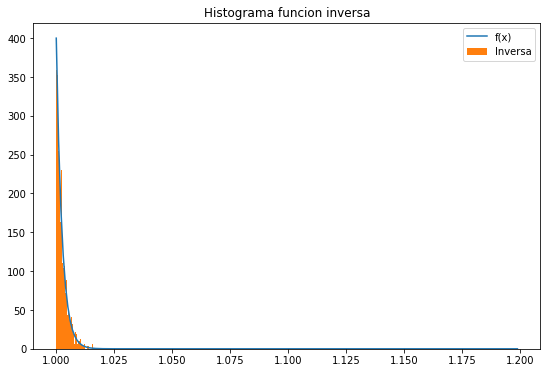

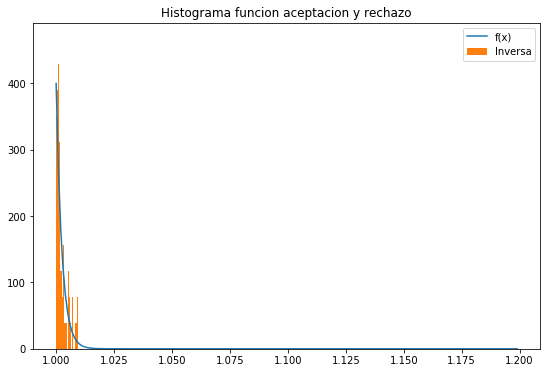

In [61]:
N = [10,100,1000]
m_real=1.0025
x=np.arange(1,1.2,.001)
f=lambda x:400*np.exp(-400*(x-1))
f_inv=lambda x:1-np.log(x)/400
plt.figure(1,figsize=[20,6])
plt.subplot(121)
plt.plot(x,f(x),label='f(x)')
plt.hist(f_inv(np.random.rand(1000)),50,normed=True,label='Inversa')
plt.legend()
plt.title('Histograma funcion inversa')
plt.show()


u1 = np.random.uniform(1, 1.02,1000)
u2 = np.random.uniform(0, 400,1000)
z=list(map(lambda x,y: x if y<=f(x) else 0,u1,u2))
temp=np.array(z)
acep_media=temp[np.nonzero(z)]
plt.figure(2,figsize=[20,6])
plt.subplot(122)
plt.plot(x,f(x),label='f(x)')
plt.hist(acep_media,50,normed=True,label='Inversa')
plt.legend()
plt.title('Histograma funcion aceptacion y rechazo')
plt.show()

def mc(N):
    u1 = np.random.rand(N)
    f_u1 = list(map(lambda x: f_inv(x),u1))
    return(np.mean(f_u1))

def me(N):

    u1 =np.random.uniform(0,.3,int(.2*N))
    u2 =np.random.uniform(.3,.5,int(.2*N))
    u3 =np.random.uniform(0.5,.7,int(.25*N))
    u4 =np.random.uniform(0.7,9,int(.15*N))
    u5 =np.random.uniform(0.9,1,int(.2*N))

    u  = [u1,u2,u3,u4,u5]
    m  = range(len(u))
    r = [.3,.2,.2,.2,.1]
    w  = list(map(lambda d,r:pesos(d,N,r),u,r))
    xi = list(map(lambda y:list(map(lambda x:f_inv(x),y)),u))
    muestras = list(map(lambda y:list(map(lambda wi,xi:xi/wi,w,y)),xi))
    return(np.concatenate(muestras).mean())

def mcom(N):
    u1 = np.random.rand(N)
    f_u1 = list(map(lambda x: f_inv(x),u1))
    media_montecarlo=np.mean(f_u1)
    u2 = 1-u1
    f_u2 = list(map(lambda x:f_inv(x),u2))
    return((np.mean(f_u2)+media_montecarlo)/2)

a=list(map(lambda n:mc(n),N))
b=list(map(lambda n:me(n),N))
c=list(map(lambda n:mcom(n),N))
d=list(map(lambda n:fun_estratificado(n),N))


In [69]:
df=pd.DataFrame(index=['Montecarlo crudo','Muestro estratificado 5 estratos','Numeros complementarios','N estratos'],columns=['10','100','1000','error1','error2','eeror3'])
df.iloc[0,0:3]=a
df.iloc[1,0:3]=b
df.iloc[2,0:3]=c
df.iloc[3,0:3]=d
df.iloc[:,3]=np.array(df.iloc[:,0])-1.0025
df.iloc[:,4]=np.array(df.iloc[:,1])-1.0025
df.iloc[:,5]=np.array(df.iloc[:,2])-1.0025
df

,10,100,1000,error1,error2,eeror3
Montecarlo crudo,1.00295,1.00271,1.00243,0.000453883,0.000211277,-7.40389e-05
Muestro estratificado 5 estratos,1.27974,1.02781,1.02798,0.277244,0.0253136,0.0254755
Numeros complementarios,1.00225,1.00254,1.00248,-0.000248963,3.84949e-05,-1.55083e-05
N estratos,1.00232,1.00254,1.0025,-0.000180354,4.13605e-05,9.99071e-07


# 6
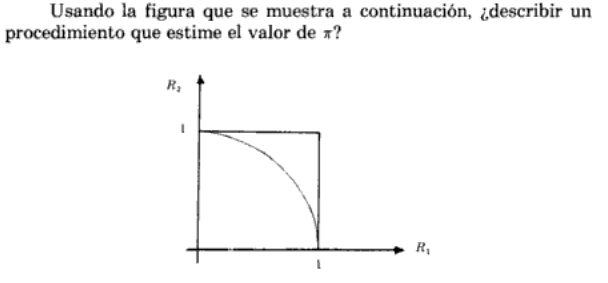

## <font color = 'red'> Nota: </font> Use el método de integración montecarlo visto en clase.
    
a). Use el método de montecarlo para aproximar el valor de pi para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *6*, para constrastar los resultados . Explique sus resultados.

In [71]:
z=list(map(lambda n:4*np.count_nonzero(np.random.rand(n)**2+np.random.rand(n)**2<1)/n,[100,1000,10000,100000]))
print('El valor de pi con 100 muestras: ',z[0])
print('El valor de pi con 1000 muestras: ',z[1])
print('El valor de pi con 10000 muestras: ',z[2])
print('El valor de pi con 100000 muestras: ',z[3])
print('el valor real de pi: ',np.pi)

El valor de pi con 100 muestras:  2.92
El valor de pi con 1000 muestras:  3.124
El valor de pi con 10000 muestras:  3.1576
El valor de pi con 100000 muestras:  3.13756
el valor real de pi:  3.141592653589793


**Valor de los ejercicios**
- 1- 2 puntos
- 2- 2 puntos
- 3- 1 punto
- 4- 1 punto
- 5- 3 puntos
- 6- 1 punto

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>